<a href="https://www.kaggle.com/code/lalit7881/best-predictive-accuracy-achieved-with-linear-regr?scriptVersionId=296245045" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-academic-stress-level/academic Stress level - maintainance 1.csv


## Student Academic Stress Analysis

## Description

Academic stress among students refers to the mental, emotional, and physical pressure experienced due to academic demands and expectations. It commonly arises from factors such as heavy coursework, frequent examinations, tight deadlines, high parental and societal expectations, competition among peers, and concerns about future career prospects.

Excessive academic stress can negatively impact a student’s concentration, motivation, academic performance, and overall well-being. Prolonged stress may lead to anxiety, burnout, sleep disturbances, reduced self-confidence, and decreased interest in learning. In severe cases, it can also affect physical health and social relationships.

Understanding and analyzing student academic stress levels is essential for identifying key stressors and developing effective support systems. Early intervention through stress management strategies, balanced academic planning, mentorship, counseling, and a supportive learning environment can help students cope better, improve performance, and maintain mental well-being.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-academic-stress-level/academic Stress level - maintainance 1.csv")

In [3]:
# Step 4: Check dataset shape
df.shape


(140, 9)

In [4]:
# Step 3: View basic information
df.head()


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [5]:
# Step 5: Check column names
df.columns


Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index '],
      dtype='object')

In [6]:
# Step 6: Dataset summary (data types & null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [7]:
# Step 7: Statistical summary
df.describe()


,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [8]:
# Step 8: Check missing values
df.isnull().sum()


Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [9]:
df = df.dropna()


In [10]:
# Step 10: Check duplicate rows
df.duplicated().sum()


np.int64(0)

In [11]:
# Step 12: Encode categorical columns (if present)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])


In [12]:
# Step 13: Final cleaned dataset preview
df.head()


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,18,2,4,5,0,0,0,3,5
1,19,2,3,4,1,0,0,3,3
2,20,2,1,1,1,2,0,2,4
3,21,2,3,2,1,0,0,4,3
4,22,2,3,3,1,0,0,4,5


## Data visualizations

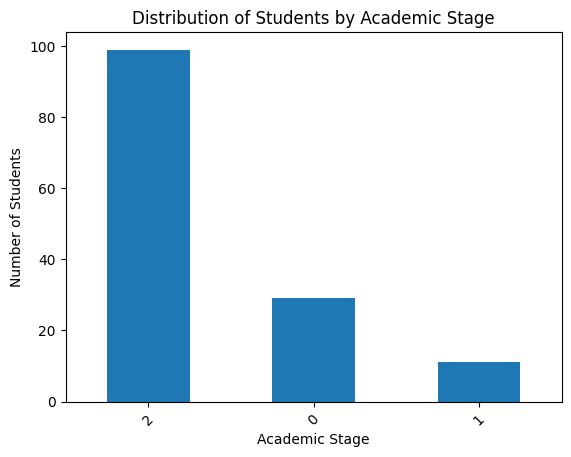

In [13]:
plt.figure()
df['Your Academic Stage'].value_counts().plot(kind='bar')
plt.title("Distribution of Students by Academic Stage")
plt.xlabel("Academic Stage")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

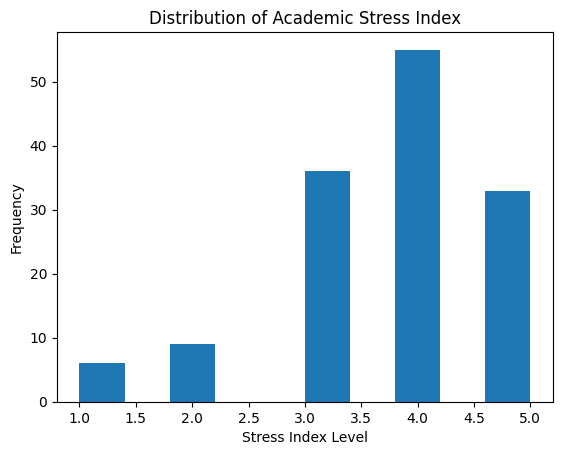

In [14]:
plt.figure()
plt.hist(df['Rate your academic stress index '], bins=10)
plt.title("Distribution of Academic Stress Index")
plt.xlabel("Stress Index Level")
plt.ylabel("Frequency")
plt.show()


<Figure size 640x480 with 0 Axes>

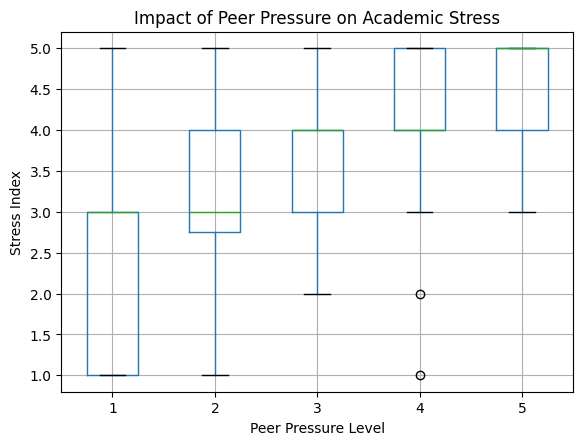

In [15]:
plt.figure()
df.boxplot(
    column='Rate your academic stress index ',
    by='Peer pressure'
)
plt.title("Impact of Peer Pressure on Academic Stress")
plt.suptitle("")
plt.xlabel("Peer Pressure Level")
plt.ylabel("Stress Index")
plt.show()


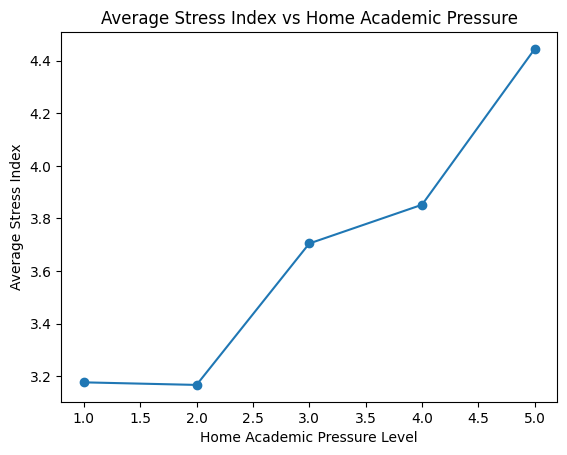

In [16]:
plt.figure()
df.groupby(
    'Academic pressure from your home'
)['Rate your academic stress index '].mean().plot(marker='o')

plt.title("Average Stress Index vs Home Academic Pressure")
plt.xlabel("Home Academic Pressure Level")
plt.ylabel("Average Stress Index")
plt.show()


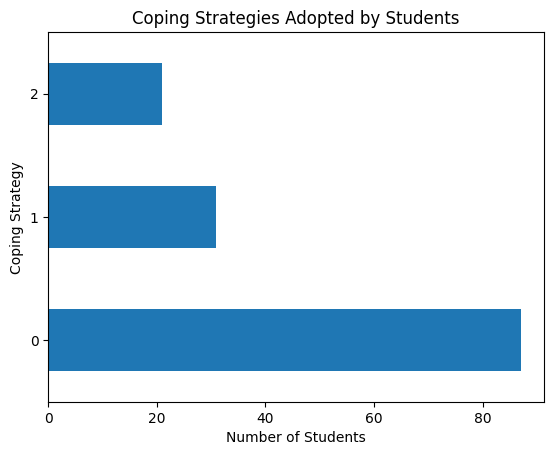

In [17]:
plt.figure()
df['What coping strategy you use as a student?'].value_counts().plot(kind='barh')
plt.title("Coping Strategies Adopted by Students")
plt.xlabel("Number of Students")
plt.ylabel("Coping Strategy")
plt.show()


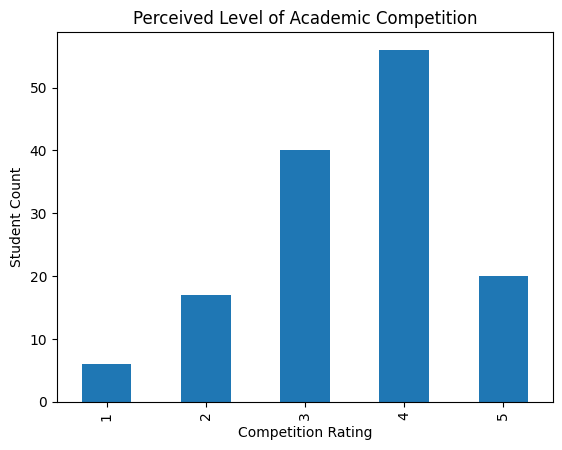

In [18]:
plt.figure()
df['What would you rate the academic  competition in your student life'] \
    .value_counts().sort_index().plot(kind='bar')

plt.title("Perceived Level of Academic Competition")
plt.xlabel("Competition Rating")
plt.ylabel("Student Count")
plt.show()


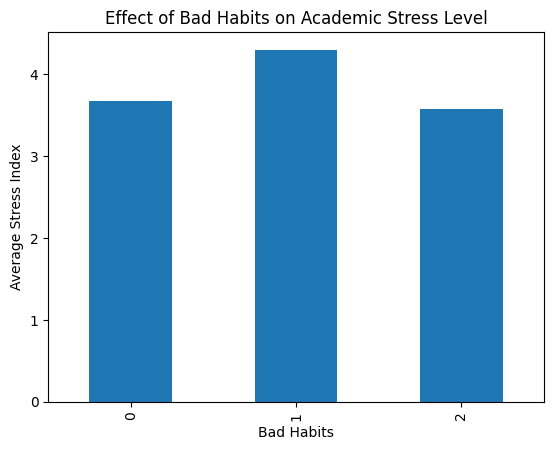

In [19]:
plt.figure()
df.groupby(
    'Do you have any bad habits like smoking, drinking on a daily basis?'
)['Rate your academic stress index '].mean().plot(kind='bar')

plt.title("Effect of Bad Habits on Academic Stress Level")
plt.xlabel("Bad Habits")
plt.ylabel("Average Stress Index")
plt.show()


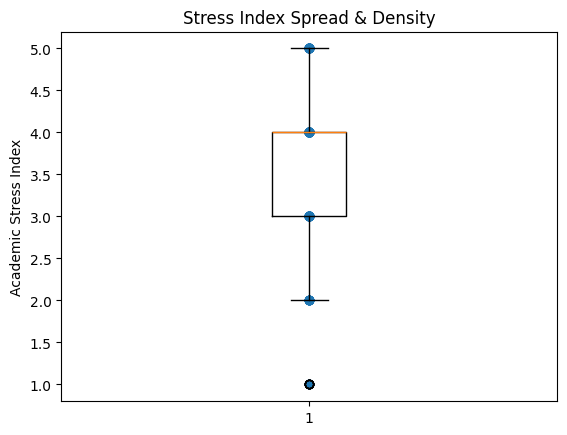

In [20]:
plt.figure()
plt.boxplot(df['Rate your academic stress index '])
plt.scatter(
    [1]*len(df),
    df['Rate your academic stress index ']
)
plt.title("Stress Index Spread & Density")
plt.ylabel("Academic Stress Index")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [22]:
target = 'Rate your academic stress index '

X = df.drop(columns=[target])
y = df[target]


In [23]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: []
Numerical Features: ['Timestamp', 'Your Academic Stage', 'Peer pressure', 'Academic pressure from your home', 'Study Environment', 'What coping strategy you use as a student?', 'Do you have any bad habits like smoking, drinking on a daily basis?', 'What would you rate the academic  competition in your student life']


In [24]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}


In [29]:
results = []

for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R2 Score": r2,
        "MSE": mse
    })
    
    print(f"\n{name}")
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")



Linear Regression
R² Score: 0.365
Mean Squared Error: 0.786

Ridge Regression
R² Score: 0.364
Mean Squared Error: 0.787

Lasso Regression
R² Score: -0.016
Mean Squared Error: 1.258

Decision Tree
R² Score: 0.077
Mean Squared Error: 1.143

Random Forest
R² Score: 0.352
Mean Squared Error: 0.802

Gradient Boosting
R² Score: 0.292
Mean Squared Error: 0.877

SVR
R² Score: 0.246
Mean Squared Error: 0.934


In [30]:
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
results_df


,Model,R2 Score,MSE
0,Linear Regression,0.365289,0.786103
1,Ridge Regression,0.364439,0.787155
4,Random Forest,0.352182,0.802336
5,Gradient Boosting,0.292012,0.876857
6,SVR,0.245808,0.934082
3,Decision Tree,0.077240,1.142857
2,Lasso Regression,-0.015962,1.258290


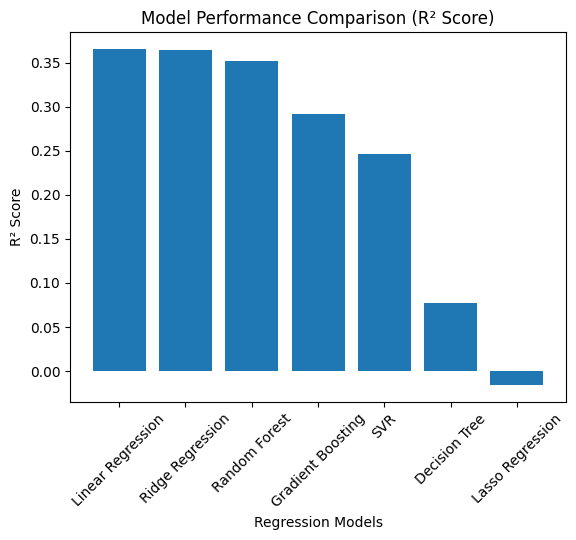

In [31]:
plt.figure()
plt.bar(results_df["Model"], results_df["R2 Score"])
plt.title("Model Performance Comparison (R² Score)")
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()


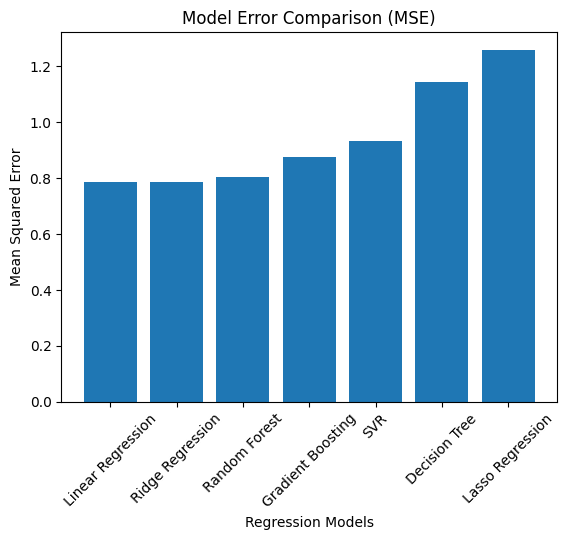

In [32]:
plt.figure()
plt.bar(results_df["Model"], results_df["MSE"])
plt.title("Model Error Comparison (MSE)")
plt.xlabel("Regression Models")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()


## Thank you...pls upvote!!!